Measurement_Data/Glock/Data/
Opening files from this path =  Measurement_Data/Glock/Data/


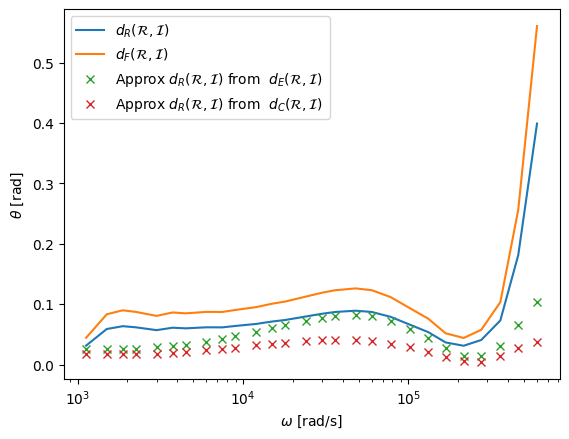

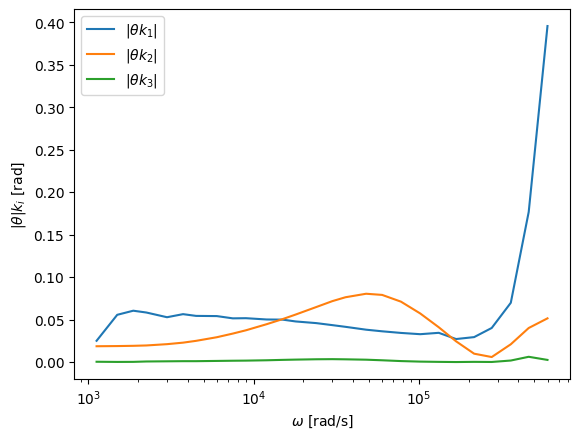

Computing F measure Tilde


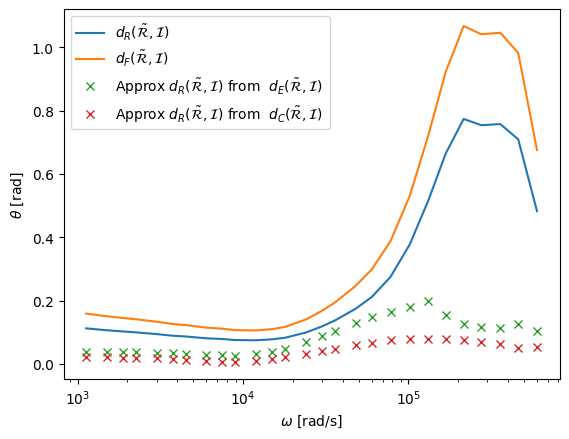

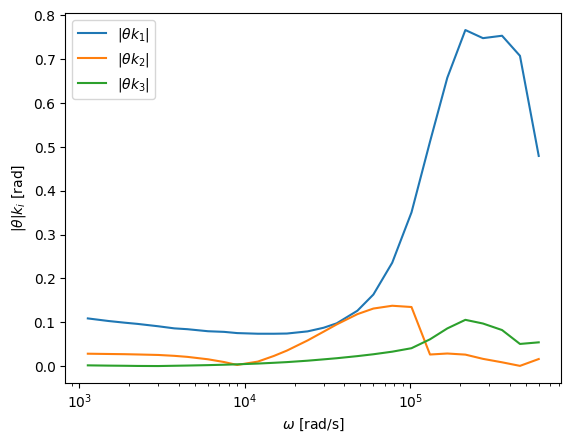

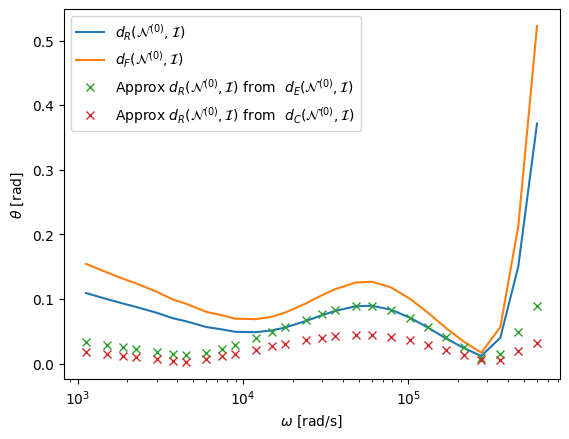

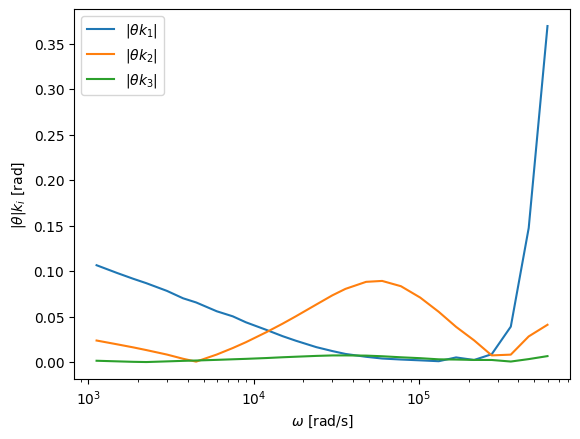

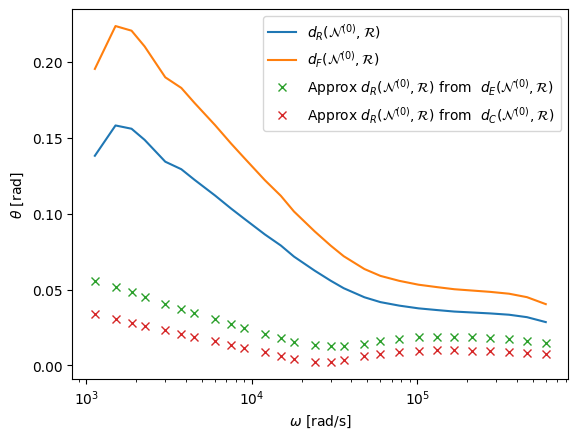

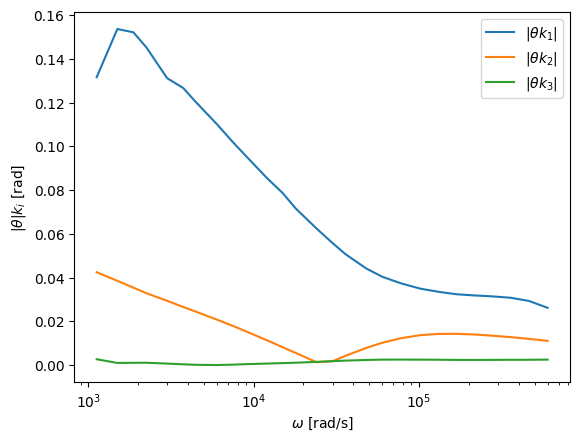

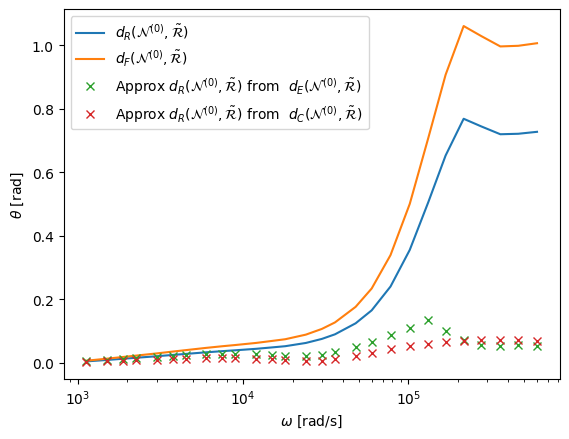

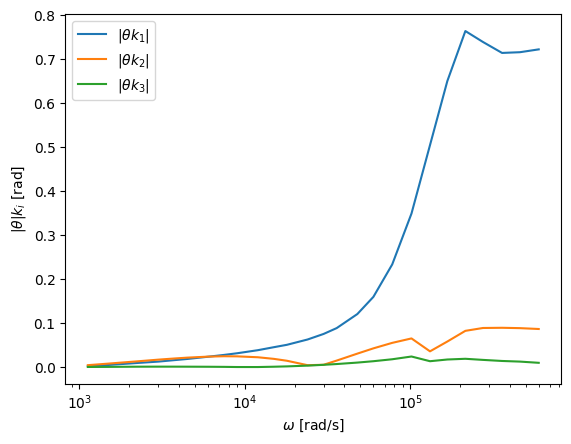

In [1]:
from main import main
from matplotlib import pyplot as plt
import numpy as np

DirList=["Measurement_Data/Glock/Data/"]

MaxOmega=1e8
for directory in DirList:
    print(directory)
    RIResults,RtildeIResults,N0IResults, N0RResults, N0RtildeResults=main(directory,MaxOmega,Figures="On")
    plt.show()


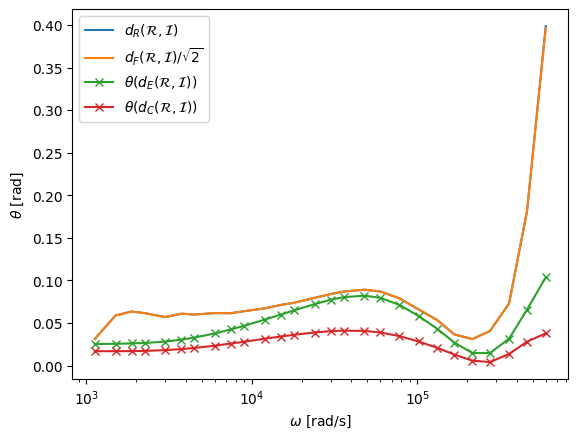

In [3]:
Frequencies=RIResults["Frequencies"]
MinAnglestoreRI=RIResults["MinAnglestoreRI"]
AnglestoreRIfmeasapprxconstsortedmin=np.fmin(RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_min"],RIResults["AnglestoreRIfmeasapprxconstsortedmindiff_min"])
AnglestoreRIcommeasapprxconstsortedmin=np.fmin(RIResults["AnglestoreRIcommeasapprxconstsortedmaxdiff_min"],RIResults["AnglestoreRIcommeasapprxconstsortedmindiff_min"])
dFMinAnglestoreRI = RIResults["dFMinAnglestoreRI"]
fig=plt.figure()
plt.semilogx(Frequencies,MinAnglestoreRI,label=r'$d_R({\cal R},{\cal I})$')
plt.semilogx(Frequencies,dFMinAnglestoreRI/np.sqrt(2),label=r'$d_F({\cal R},{\cal I})/\sqrt{2}$')
plt.semilogx(Frequencies,AnglestoreRIfmeasapprxconstsortedmin,'x-',label=r'$\theta(d_E({\cal R},{\cal I}))$ ')
plt.semilogx(Frequencies,AnglestoreRIcommeasapprxconstsortedmin,'x-',label=r'$\theta(d_C({\cal R},{\cal I}))$ ')
plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
#plt.ylim(0,0.3)
plt.legend()
#plt.savefig("glock_dRanddE_metrics.pdf")
plt.savefig("glock_measured_RI.pdf")
plt.show()

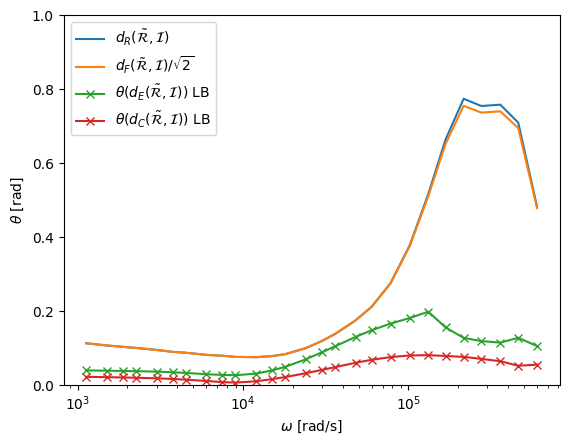

In [5]:
Frequencies=RtildeIResults["Frequencies"]
MinAnglestoreRtildeI=RtildeIResults["MinAnglestoreRtildeI"]
AnglestoreRtildeIfmeasapprxconstsortedmin=np.fmin(RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_min"],RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmindiff_min"])
AnglestoreRtildeIcommeasapprxconstsortedmin=np.fmin(RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_min"],RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmindiff_min"])

dFMinAnglestoreRtildeI = RtildeIResults["dFMinAnglestoreRtildeI"]

fig=plt.figure()
plt.semilogx(Frequencies,MinAnglestoreRtildeI,label=r'$d_R(\tilde{\cal R},{\cal I})$')
plt.semilogx(Frequencies,dFMinAnglestoreRtildeI/np.sqrt(2),label=r'$d_F(\tilde{\cal R},{\cal I})/\sqrt{2}$')
plt.semilogx(Frequencies,AnglestoreRtildeIfmeasapprxconstsortedmin,'x-',label=r'$\theta(d_E(\tilde{\cal R},{\cal I}))$ LB')
plt.semilogx(Frequencies,AnglestoreRtildeIcommeasapprxconstsortedmin,'x-',label=r'$\theta(d_C(\tilde{\cal R},{\cal I}))$ LB')

plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.ylim(0,1.0)
plt.legend()
#plt.savefig("glock_dRanddE_metrics_tilde.pdf")
plt.savefig("glock_measured_RtildeI.pdf")
plt.show()

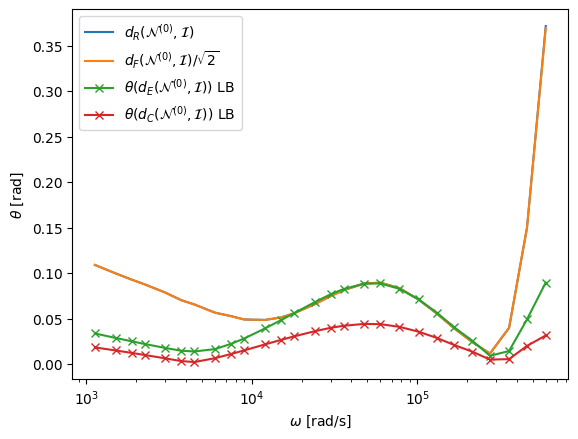

In [6]:

Frequencies=N0IResults["Frequencies"]
MinAnglestoreN0I=N0IResults["MinAnglestoreN0I"]
AnglestoreN0Ifmeasapprxconstsortedmin=np.fmin(N0IResults["AnglestoreN0Ifmeasapprxconstsortedmaxdiff_min"],N0IResults["AnglestoreN0Ifmeasapprxconstsortedmindiff_min"])
AnglestoreN0Icommeasapprxconstsortedmin=np.fmin(N0IResults["AnglestoreN0Icommeasapprxconstsortedmaxdiff_min"],N0IResults["AnglestoreN0Icommeasapprxconstsortedmindiff_min"])

dFMinAnglestoreN0I = N0IResults["dFMinAnglestoreN0I"]
fig=plt.figure()
plt.semilogx(Frequencies,MinAnglestoreN0I,label=r'$d_R({\cal N}^{(0)},{\cal I})$')
plt.semilogx(Frequencies,dFMinAnglestoreN0I/np.sqrt(2),label=r'$d_F({\cal N}^{(0)},{\cal I})/\sqrt{2}$')
plt.semilogx(Frequencies,AnglestoreN0Ifmeasapprxconstsortedmin,'x-',label=r'$\theta(d_E({\cal N}^{(0)},{\cal I}))$ LB')
plt.semilogx(Frequencies,AnglestoreN0Icommeasapprxconstsortedmin,'x-',label=r'$\theta(d_C({\cal N}^{(0)},{\cal I}))$ LB ')


plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
#plt.ylim(0,0.2)
plt.legend()
plt.savefig("glock_measured_N0I.pdf")

plt.show()

In [3]:
# Read data
TensorArray = np.genfromtxt(directory+'Tensors.csv', dtype=complex, delimiter=', ')
N0 =          np.genfromtxt(directory+'N0.csv', dtype=float, delimiter=',')
Frequencies = np.genfromtxt(directory+'Frequencies.csv', dtype=float, delimiter=', ')

N=len(Frequencies)
LambdaR =np.zeros((N,3))
LambdaI =np.zeros((N,3))

for n in range(N):
    Mlist = TensorArray[n,:]
    Mten = np.array([[Mlist[0], Mlist[1], Mlist[2]],[Mlist[3], Mlist[4], Mlist[5]],[Mlist[6], Mlist[7], Mlist[8]]])
    Rtilde = np.real(Mten)
    I = np.imag(Mten)
    
    # Computation of eigenvalues, eigenvector
    uI,VI = np.linalg.eig(I)
    uRtilde,VRtilde = np.linalg.eig(Rtilde)
    LambdaR[n,:]=uRtilde[:]
    LambdaI[n,:]=uI[:]
    
    

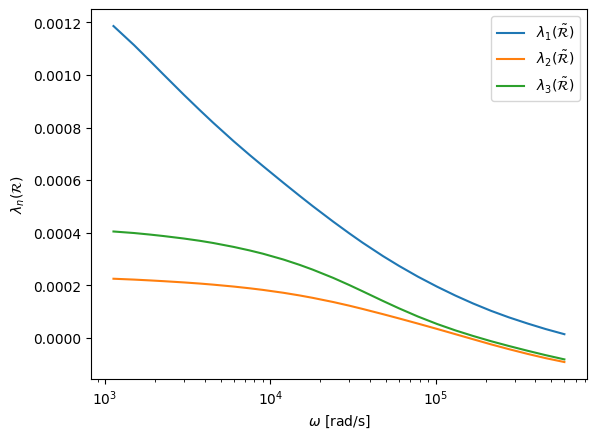

In [20]:
plt.figure()
labels=[r"$\lambda_1(\tilde{\cal R})$",r"$\lambda_2(\tilde{\cal R})$",r"$\lambda_3(\tilde{\cal R})$"]
for n in range(3):
    plt.semilogx(Frequencies[:], LambdaR[:,n], label=labels[n])
plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\lambda_n({\cal R})$')
plt.legend()
plt.savefig("glock_measured_RealEigenvalues.pdf")
plt.show()


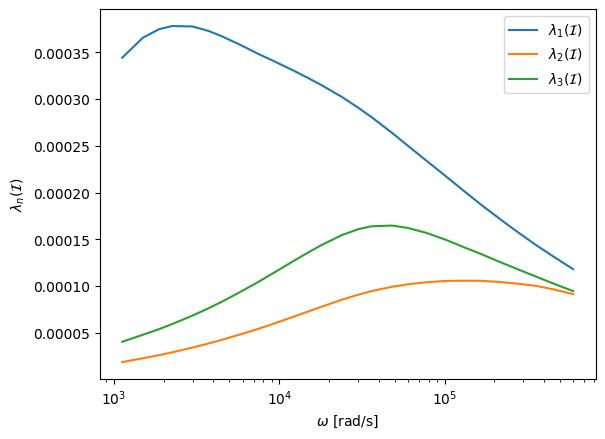

In [21]:
plt.figure()
labels=[r"$\lambda_1({\cal I})$",r"$\lambda_2({\cal I})$",r"$\lambda_3({\cal I})$"]
for n in range(3):
    plt.semilogx(Frequencies[:], LambdaI[:,n], label=labels[n])
plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\lambda_n({\cal I})$')
plt.legend()
plt.savefig("glock_measured_ImaginaryEigenvalues.pdf")
plt.show()

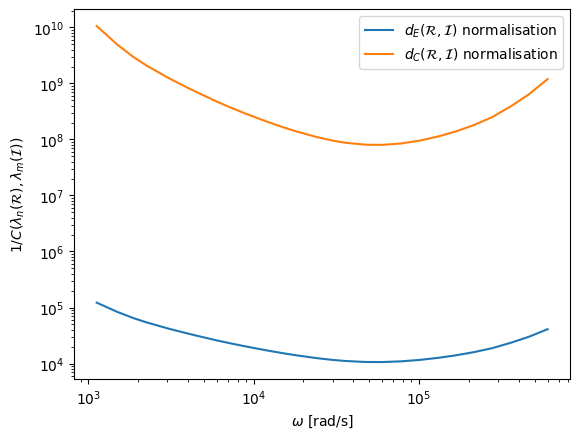

In [7]:
Frequencies=RIResults["Frequencies"]
RIcommeapprx_den_const=np.fmin(RIResults["RIcommeapprx_den_const_max"],RIResults["RIcommeapprx_den_const_min"])
RIfmeasapprx_den_const=np.fmin(RIResults["RIfmeasapprx_den_const_max"],RIResults["RIfmeasapprx_den_const_min"])



dFMinAnglestoreRI = RIResults["dFMinAnglestoreRI"]
fig=plt.figure()
plt.loglog(Frequencies,1/RIfmeasapprx_den_const,label=r'$d_E({\cal R},{\cal I})$ normalisation')
plt.loglog(Frequencies,1/RIcommeapprx_den_const,label=r'$d_C({\cal R},{\cal I})$ normalisation')


plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$1/C(\lambda_n({\cal R}),\lambda_m({\cal I}))$')
plt.legend()
plt.savefig("glock_measured_RI_den.pdf")
plt.show()

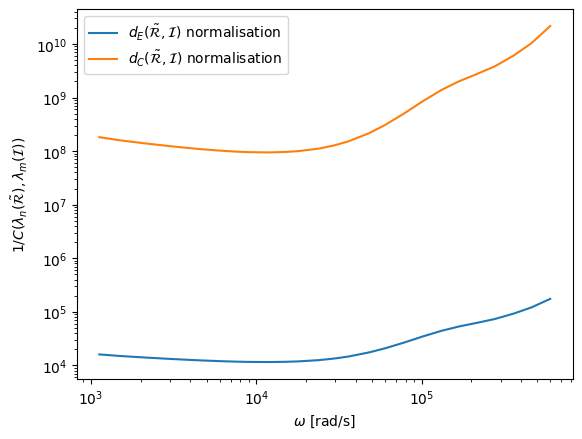

In [9]:
Frequencies=RtildeIResults["Frequencies"]
RtildeIcommeapprx_den_const=np.fmin(RtildeIResults["RtildeIcommeapprx_den_const_max"],RtildeIResults["RtildeIcommeapprx_den_const_min"])
RtildeIfmeasapprx_den_const=np.fmin(RtildeIResults["RtildeIfmeasapprx_den_const_max"],RtildeIResults["RtildeIfmeasapprx_den_const_min"])

fig=plt.figure()
plt.loglog(Frequencies,1/RtildeIfmeasapprx_den_const,label=r'$d_E(\tilde{\cal R},{\cal I})$ normalisation')
plt.loglog(Frequencies,1/RtildeIcommeapprx_den_const,label=r'$d_C(\tilde{\cal R},{\cal I})$ normalisation')


plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$1/C(\lambda_n(\tilde{\cal R}),\lambda_m({\cal I}))$')
plt.legend()
plt.savefig("glock_measured_Rtilde0I_den.pdf")
plt.show()

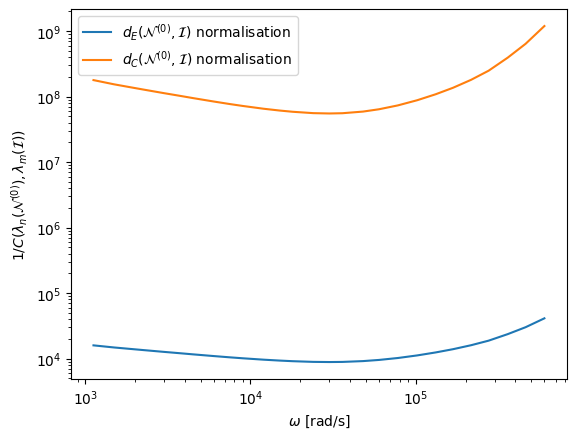

In [8]:
Frequencies=RIResults["Frequencies"]
N0Icommeapprx_den_const=np.fmin(N0IResults["N0Icommeapprx_den_const_max"],N0IResults["N0Icommeapprx_den_const_min"])
N0Ifmeasapprx_den_const=np.fmin(N0IResults["N0Ifmeasapprx_den_const_max"],N0IResults["N0Ifmeasapprx_den_const_min"])

fig=plt.figure()
plt.loglog(Frequencies,1/N0Ifmeasapprx_den_const,label=r'$d_E({\cal N}^{(0)},{\cal I})$ normalisation')
plt.loglog(Frequencies,1/N0Icommeapprx_den_const,label=r'$d_C({\cal N}^{(0)},{\cal I})$ normalisation')


plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$1/C(\lambda_n({\cal N}^{(0)}),\lambda_m({\cal I}))$')
plt.legend()
plt.savefig("glock_measured_N0I_den.pdf")
plt.show()